# Robustness Analysis

This notebook is used to compute the robustness of the selected optimal policies.

In [1]:
import pandas as pd
from ema_workbench import load_results
import matplotlib.pyplot as plt
import os
from dmdu.general.visualization import plot_robustness
from dmdu.policydiscovery.analysis.robustness import get_robustness_dataframe
from model.enumerations import ProblemFormulation

## Relevant Problem Formulations

In [2]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED,
    ProblemFormulation.EGALITARIAN_AGGREGATED,
    ProblemFormulation.EGALITARIAN_DISAGGREGATED,
    ProblemFormulation.PRIORITARIAN_AGGREGATED,
    ProblemFormulation.PRIORITARIAN_DISAGGREGATED,
]

## Loading Experimental Results
Loading the results from running all selected optimal policies with 400 scenarios.

In [3]:
problem_formulations_dict = {}

for problem_formulation in problem_formulations:
    target_directory = os.path.join(
        os.path.dirname(os.getcwd()),
        'data',
        'experiments_bad',
        f'results_{problem_formulation.name}'
    )
    experiments, outcomes = load_results(target_directory)
    outcomes = pd.DataFrame(outcomes)
    problem_formulations_dict[problem_formulation.name] = experiments, outcomes

## Relevant Outcome Names

In [4]:
names = [
    'Utility',
    # 'Total Output',
    # 'Damages',
    'Disutility',
    'Atmospheric Temperature',
    # 'Industrial Emission',
    # 'Temperature overshoot'
]
names = [name + ' 2105' for name in names]

## Compute Robustness

In [5]:
# Compute robustness for each outcome
robustness_dataframe = None
for problem_formulation, (experiments, outcomes) in problem_formulations_dict.items():

    outcomes = outcomes.loc[:, names]

    df = get_robustness_dataframe(experiments, outcomes, problem_formulation)
    if robustness_dataframe is None:
        robustness_dataframe = df
    else:
        robustness_dataframe = pd.concat([robustness_dataframe, df])


[]

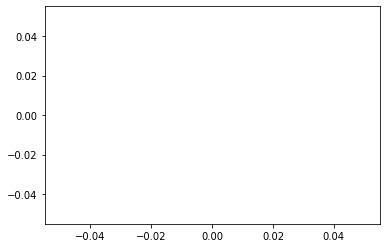

In [6]:
plt.plot()

In [7]:
robustness_dataframe

,Policy,hurwicz\nwelfare,90minimax\nwelfare loss,starr\natmospheric\ntemperature,Problem Formulation
0,0,10037.963075,46.327522,0.80,UTILITARIAN_AGGREGATED
1,1,10071.603018,34.669677,0.98,UTILITARIAN_AGGREGATED
2,2,10071.618910,34.634408,0.98,UTILITARIAN_AGGREGATED
3,3,10071.289308,34.368342,0.98,UTILITARIAN_AGGREGATED
4,4,10071.618910,34.634407,0.98,UTILITARIAN_AGGREGATED
...,...,...,...,...,...
11,25,3068.786562,34.774070,0.98,PRIORITARIAN_DISAGGREGATED
12,26,2699.962374,36.237499,0.98,PRIORITARIAN_DISAGGREGATED
13,27,9459.820110,30.632940,0.98,PRIORITARIAN_DISAGGREGATED
14,28,5620.145541,44.377149,0.90,PRIORITARIAN_DISAGGREGATED


## Visualization of Robustness

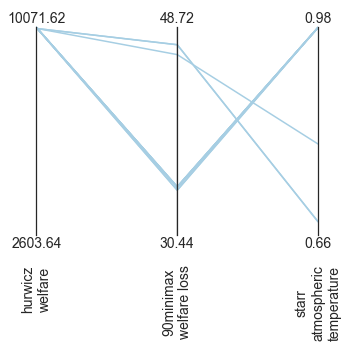

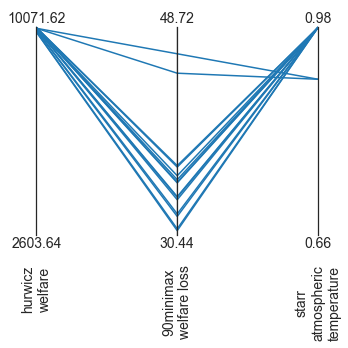

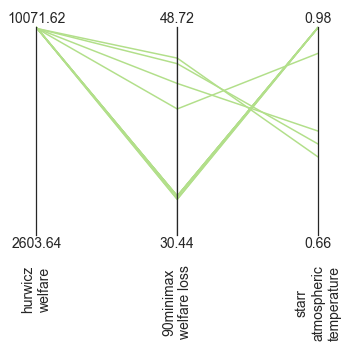

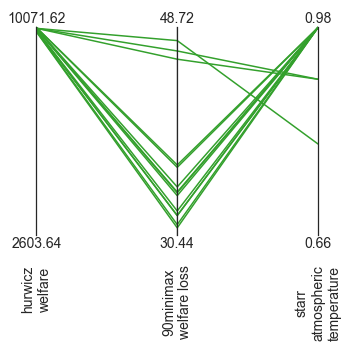

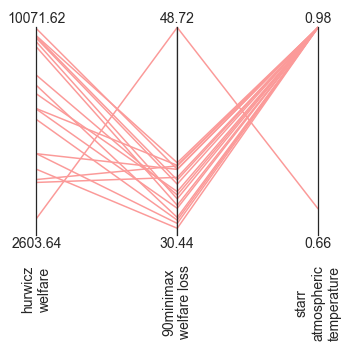

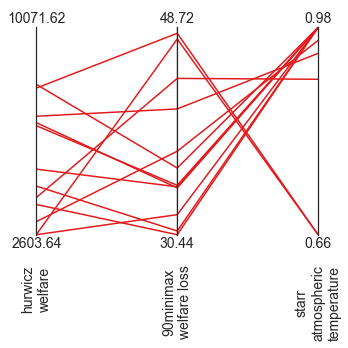

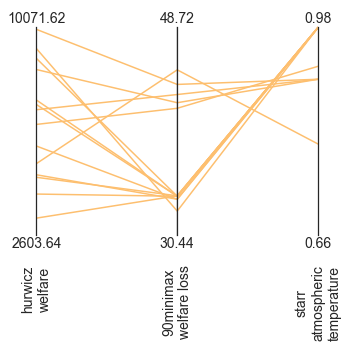

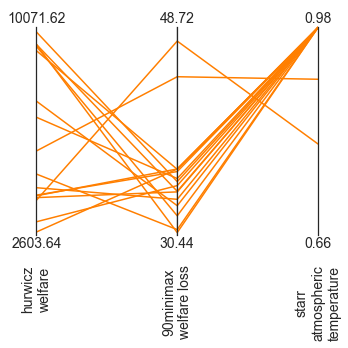

In [8]:
for problem_formulation in problem_formulations:
    plot_robustness(robustness_dataframe, problem_formulation.name, saving=True, file_name=f'robustness_{problem_formulation.name}')

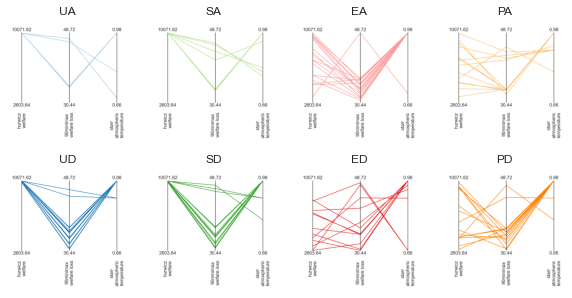

In [9]:
from matplotlib import pyplot as plt

image_folder = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())),
    'outputimages',
    'optimalpolicies'
)

images = []
for problem_formulation in problem_formulations:
    file_name = f'robustness_{problem_formulation.name}.png'
    img = plt.imread(os.path.join(image_folder, file_name))
    images.append(img)

fig, axes = plt.subplots(2, 4, figsize=(10,5))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axes[0,0].imshow(images[0])
axes[1,0].imshow(images[1])
axes[0,1].imshow(images[2])
axes[1,1].imshow(images[3])
axes[0,2].imshow(images[4])
axes[1,2].imshow(images[5])
axes[0,3].imshow(images[6])
axes[1,3].imshow(images[7])

axes[0,0].set_title('UA')
axes[1,0].set_title('UD')
axes[0,1].set_title('SA')
axes[1,1].set_title('SD')
axes[0,2].set_title('EA')
axes[1,2].set_title('ED')
axes[0,3].set_title('PA')
axes[1,3].set_title('PD')

axes[0,0].axis('off')
axes[1,0].axis('off')
axes[0,1].axis('off')
axes[1,1].axis('off')
axes[0,2].axis('off')
axes[1,2].axis('off')
axes[0,3].axis('off')
axes[1,3].axis('off')

path = os.path.join(image_folder, 'robustness_all.png')
fig.savefig(path, dpi=200, bbox_inches='tight')